# Clustering: HAC  

Hierarchical Agglomerative Clustering (HAC) / Classification Ascendante Hiérarchique (CAH)

**Presentation of the algorithm used in this notebook is Hierarchical Clustering (CAH) on a small dataset.**

In [1]:
# The packages

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

## Reminder: The Euclidean distance

In **2D** the **Euclidean distance** between two points $i$ and $j$ of respective coordinates $(x_i, y_i)$ and $(x_j, y_j)$:  

$$\text{distance}_{euclidean}(i,j) = \sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}$$  

In [2]:
a = np.array([8, 5])
b = np.array([2, 7])

print(np.sqrt(np.sum((a - b)**2)))

# Verification:
((8 - 2)**2 + (5 - 7)**2)**0.5==np.sqrt(np.sum((a - b)**2))

6.324555320336759


np.True_

We need to introduce **For loop** to calculate the euclidean distance of all the points of the clusters. 

In [3]:
a = np.array([8, 5])
b = np.array([2, 7])
c = np.array([3, 6])

cluster_1 = np.array([a, b])
print(f"cluster_1: \n{cluster_1}")

cluster_2 = np.array([c])
print(f"cluster_2: \n{cluster_2}")

for i in cluster_1:
    for j in cluster_2:
        print(f"Distance between {i} and {j}: {np.sqrt(np.sum((i - j)**2))}")

cluster_1: 
[[8 5]
 [2 7]]
cluster_2: 
[[3 6]]
Distance between [8 5] and [3 6]: 5.0990195135927845
Distance between [2 7] and [3 6]: 1.4142135623730951


The **single linkage cluster distance** between two clusters $cluster_1$ and $cluster_2$ in **2D** is definied as:  

$\text{for i cluster}_1$  
    $\text{for j in cluster}_2$  
        $$min(\text{distance}_{euclidean}(i,j) = \sqrt{(x_i - x_j)^2 + (y_i - y_j)^2})$$

**Find the minimum distance between two clusters.**

In [4]:
def cluster_distance(c1, c2):
    '''Using the euclidean distance to calculate the distance between two clusters.'''
    min_dist = float('inf')
    for i in c1:
        for j in c2:
            dx = i[0] - j[0]
            dy = i[1] - j[1]
            dist = (dx ** 2 + dy ** 2) ** 0.5
            if dist < min_dist:
                min_dist = dist
    return min_dist


cluster_distance(cluster_1, cluster_2)

np.float64(1.4142135623730951)

## Single linkage clustering - Step-by-step Explanation

We will focus on **single linkage** (_saut minimum_) explanation based on proximity criteria:  

$\delta_{SL}(C_k, C_l) = \min\limits_{\substack{x_i \in C_k \\ x_j \in C_l}} \delta(x_i, x_j)$

The explanations on **complete linkage** (_diamètre_) and **average linkage** (_moyenne_) are similar.  
Only the proximity criteria changes as follow respectively:  

$\delta_{SL}(C_k, C_l) = \max\limits_{\substack{x_i \in C_k \\ x_j \in C_l}} \delta(x_i, x_j)$

$\delta_{AL}(C_k, C_l) = \dfrac{1}{|C_k|\times|C_l|}\sum\limits_{\substack{x\in C_k, x_j \in C_l}}\delta(x_i, x_j)$. 


We will use a dataset of 5 points with 2D coordinates to explain the HAC single linkage step-by-step.
| Five 2D points | Coordinates |
| ----- | ----------- |
| A     | (1, 1)      |
| B     | (2, 1)      |
| C     | (4, 3)      |
| D     | (5, 4)      |
| E     | (3, 4)      |

* **Step 1: Initialization**  

Each point is a cluster :  

C1 = {A}  
C2 = {B}  
C3 = {C}  
C4 = {D}  
C5 = {E}
* **Step 2: distances calculation**  

The matrix of Euclidean distances

|     | {A}   | {B}   | {C}   | {D}   | {E}   |
| -   | ---   | ---   | ---   | ---   | ---   |
| {A} | 0     | 1.0   | 3.6   | 5.0   | 3.6   |
| {B} | 1.0   | 0     | 2.8   | 4.2   | 3.2   |
| {C} | 3.6   | 2.8   | 0     | 1.4   | 1.4   |
| {D} | 5.0   | 4.2   | 1.4   | 0     | 2.0   |
| {E} | 3.6   | 3.2   | 1.4   | 2.0   | 0     |
* **Step 3 Merge with single linkage**  
 

Minimale distance :  

=> A – B = 1.0  

Merge : C1 + C2 → C1' = {A, B}  

New clusters :  

C1' = {A, B}  
C3 = {C}  
C4 = {D}  
C5 = {E}
* **Step 4: update the distances and merge**

We update the distances:  

{AB} – {C} :  
= min(dist(A–C), dist(B–C))   
= min(3.6, 2.8)   
= 2.8  


{AB} – {D} :  
= min(dist(A–D), dist(B–D))  
= min(5.0, 4.2)  
= 4.2  


{AB} – {E} :  
= min(dist(A–E), dist(B–E))  
= min(3.6, 3.2)  
= 3.2  


The matrix of Euclidean distances

|      | {AB}   | {C}   | {D}   | {E}   |
| -    | ---    | ---   | ---   | ---   |
| {AB} | 0      | 2.8   | 4.2   | 3.2   |
| {C}  | 2.8    | 0     | 1.4   | 1.4   |
| {D}  | 4.2    | 1.4   | 0     | 2.0   |
| {E}  | 3.2    | 1.4   | 2.0   | 0     |  

Two choices for the merge are possible: {C}+{D} or {C}+{E} as they both have the minimum distance = 1.4.  
We randomly choose to merge {C}+{D}.  
We have 3 clusters {AB}, {CD} and {E}.  

We update the distances:  

{CD} – {AB} :  
= min(dist(C–AB), dist(D–AB))  
= min(2.8, 4.2)  
= 2.8  

{CD} – {E} :  
= min(dist(C–E), dist(D–E))  
= min(1.4, 2.0)  
= 1.4  

|      | {AB} | {CD} | {E} |
| ---- | ---- | ---- | --- |
| {AB} | 0    | 2.8  | 3.2 |
| {CD} | 2.8  | 0    | 1.4 |
| {E}  | 3.2  | 1.4  | 0   |

We merge {CD} and {E}.  
We have now two clusters: {AB} and {CDE}.  

We update the distances:  

{CDE} – {AB} :  
min(dist(A–C), A–D, A–E, B–C, B–D, B–E)  
= min(3.6, 5.0, 3.6, 2.8, 4.2, 3.2)  
= 2.8  

|       | {AB} | {CDE} |
| ----- | ---- | ----- |
| {AB}  | 0    | 2.8   |
| {CDE} | 2.8  | 0     |


We merge {AB} and {CDE} at 2.8 of distance from each other.
📉 Summary of the merges  

| Step | Merge         | Distance |
| ----- | -------------| -------- |
| 1     | A + B        | 1.0      |
| 2     | C + D        | 1.4      |
| 3     | {CD}+ E      | 1.4      |
| 4     | {AB} + {CDE} | 2.8      |


In [5]:
def print_simple_dendrogram():
    print("A   B        C   D   E")
    print("|   |        |   |   |")
    print(" \\ /         \\ /    |      <- 1.0 et 1.4")
    print("  AB          CD     |")
    print("          _____|_____/      <- 1.4")
    print("         |           |")
    print("         |          CDE")
    print("         \\___________/      <- 2.8 (final merge)")

print_simple_dendrogram()


A   B        C   D   E
|   |        |   |   |
 \ /         \ /    |      <- 1.0 et 1.4
  AB          CD     |
          _____|_____/      <- 1.4
         |           |
         |          CDE
         \___________/      <- 2.8 (final merge)


## The complexity

At first, the calculation of the matrix of distances which represent $n \times n = n^2$ calculations  
But we don't need to calculate the diagonal so we can substract of it $n$ calculations.  
As we also only need to calculate the top of the matrix (matrix) to deduct the bottom, we can divide the calculations number by 2.  

As a result, at initialization, the number of distances calculation is: $(n^2 -n)/2 = n(n-1)/2$.  

After the first merge we have $n-1$ clusters so we will calculate $(n-1)(n-2)/2$ distances (we have use the previous formula).  
And $(n-2)(n-3)/2$ at the next step and so on ...

| Step (merge)   | Remaining clusters | Distances comparisions    |
| -------------- | -----------------  | ------------------------- |
| 0 (initial)    | n clusters         | n(n−1)/2                  |
| 1              | n−1 clusters       | (n−1)(n−2)/2              |
| 2              | n−2 clusters       | (n−2)(n−3)/2              |
| ...            | ...                | ...                       |
| n−2            | 2 clusters         | 1                         |


The total sum of the costs is:  

$\sum_{k=2}^{n}\dfrac{k(k-1)}{2} = \sum_{k=2}^{n}O(k^2) \approx{O(n^3)}$

The naive HAC algorithm has cubic time complexity $(O(n^3))$, due to repeated distance calculations at each step.  

In contrast, optimized algorithms (e.g., SLINK for single linkage) use data structures that reuse previous computations,  
reducing the time complexity to $O(n^2)$ or $O(n^2 log n)$ depending on the linkage method.

## ⚠️ Limitations in High-Dimensional Spaces  

Hierarchical Agglomerative Clustering (HAC) is not well suited for high-dimensional datasets.  
The computational cost (typically $O(n^2)$ or worse) becomes prohibitive as the number of points grows.  
In high-dimensional spaces, the curse of dimensionality affects distance metrics — distances between points tend to become similar, making clustering less meaningful.  
Moreover, HAC requires storing and updating a full distance matrix of size $O(n^2)$, which leads to memory inefficiencies.  
As a result, HAC is better used for small to moderately sized datasets with well-separated clusters in low-dimensional spaces.  

## Ward Linkage clustering - Step-by-Step Explanation

We will use the same 5 points with 2D coordinates.

| Five 2D points | Coordinates |
| -------------- | ----------- |
| A              | (1, 1)      |
| B              | (2, 1)      |
| C              | (4, 3)      |
| D              | (5, 4)      |
| E              | (3, 4)      |

Step 1: Initialization
Each point starts as its own cluster:

C1 = {A}
C2 = {B}
C3 = {C}
C4 = {D}
C5 = {E}

**Step 2: Compute the initial distances (Ward linkage).**  

With Ward's method, we look at the increase in within-cluster variance that would result from merging two clusters.    

For singleton clusters (with one point), this step reduces to calculating squared Euclidean distances between the points,  
as it corresponds to the increase in within-cluster inertia (variance).  

Let’s compute the squared Euclidean distances between all points:  

|   | A    | B    | C    | D    | E    |
| - | ---- | ---- | ---- | ---- | ---- |
| A | 0    | 1.0  | 13.0 | 25.0 | 13.0 |
| B | 1.0  | 0    | 8.0  | 18.0 | 10.0 |
| C | 13.0 | 8.0  | 0    | 2.0  | 2.0  |
| D | 25.0 | 18.0 | 2.0  | 0    | 4.0  |
| E | 13.0 | 10.0 | 2.0  | 4.0  | 0    |


🧮 These are squared Euclidean distances:  
For instance, dist²(A, C) = (1−4)² + (1−3)² = 9 + 4 = 13. 

Step 3: First merge (min increase in variance)
Smallest squared distance:
C – D = 2.0

➡️ Merge C3 + C4 → C3′ = {C, D}

We now have:

C1 = {A}
C2 = {B}
C3′ = {C, D}
C5 = {E}
Step 4: Update distances using Ward criterion
For Ward's method, merging clusters means computing the increase in total within-cluster variance (inertia):

Let’s calculate the increase in variance (Δ) when merging {C, D} with other clusters.

We use the formula for Ward linkage:

Δ(Ci, Cj) = (|Ci| × |Cj|) / (|Ci| + |Cj|) × ||μi − μj||². 
Let’s compute the centroid μ of {C, D}:  
μ_CD = ((4 + 5)/2, (3 + 4)/2) = (4.5, 3.5)  

Then compute Δ({C,D}, E):  

μ_E = (3, 4). 
||μ_CD – μ_E||² = (4.5 − 3)² + (3.5 − 4)² = 2.25 + 0.25 = 2.5  
Δ = (2×1)/(2+1) × 2.5 = 0.67 × 2.5 = 1.67  
Similarly, compute Δ({C,D}, B):  

μ_B = (2,1)  
||μ_CD – μ_B||² = (2.5)² + (2.5)² = 6.25 + 6.25 = 12.5   
Δ = (2×1)/3 × 12.5 = 8.33  
And Δ({C,D}, A):  

μ_A = (1,1)  
||μ_CD – μ_A||² = (3.5)² + (2.5)² = 12.25 + 6.25 = 18.5  
Δ = 2/3 × 18.5 = 12.33   
So the updated distance mtrix (increase in variance) is:  

|      | {A}   | {B}  | {CD}  | {E}  |
| ---- | ----- | ---- | ----- | ---- |
| {A}  | 0     | 1.0  | 12.33 | 13.0 |
| {B}  | 1.0   | 0    | 8.33  | 10.0 |
| {CD} | 12.33 | 8.33 | 0     | 1.67 |
| {E}  | 13.0  | 10.0 | 1.67  | 0    |


Step 5: Merge {CD} and E (minimum increase = 1.67). 
➡️ C3′′ = {C, D, E}  

New clusters:  

C1 = {A}  
C2 = {B}  
C3′′ = {C, D, E}  

Step 6: Update distances again  
Compute Δ({CDE}, A):  

μ_CDE = ((4+5+3)/3, (3+4+4)/3) = (4, 3.67)  
μ_A = (1,1)  
||μ_CDE – μ_A||² = (3)² + (2.67)² ≈ 9 + 7.11 = 16.11  
Δ = (3×1)/4 × 16.11 = 0.75 × 16.11 = 12.08  
Δ({CDE}, B):  

μ_B = (2,1)  
||μ_CDE – μ_B||² = (2)² + (2.67)² = 4 + 7.11 = 11.11  
Δ = 0.75 × 11.11 = 8.33  

|       | {A}   | {B}  | {CDE} |
| ----- | ----- | ---- | ----- |
| {A}   | 0     | 1.0  | 12.08 |
| {B}   | 1.0   | 0    | 8.33  |
| {CDE} | 12.08 | 8.33 | 0     |


➡️ Merge {B} and {CDE} → C4 = {B, C, D, E}

Step 7: Final merge: {A} + {BCDE}
μ_BCDE = mean of points B, C, D, E
= ((2+4+5+3)/4, (1+3+4+4)/4) = (3.5, 3.0)
μ_A = (1,1)

||μ – μ||² = (2.5)² + (2.0)² = 6.25 + 4 = 10.25
Δ = (4×1)/5 × 10.25 = 0.8 × 10.25 = 8.2  

📉 Summary of Merges (Ward method)  

| Step | Merge      | Increase in variance (Δ) |
| ---- | ---------- | ------------------------ |
| 1    | C + D      | 2.0                      |
| 2    | {CD} + E   | 1.67                     |
| 3    | {CDE} + B  | 8.33                     |
| 4    | {BCDE} + A | 8.2                      |
  
Note: the final step merged at slightly lower cost than the previous due to rounding approximations.

## HAC from scratch

### Data

In [6]:
import numpy as np

# Dictionnaire of the points with labels
points = {
    "A": np.array([1, 1]),
    "B": np.array([2, 1]),
    "C": np.array([4, 3]),
    "D": np.array([5, 4]),
    "E": np.array([3, 4])
}
points

{'A': array([1, 1]),
 'B': array([2, 1]),
 'C': array([4, 3]),
 'D': array([5, 4]),
 'E': array([3, 4])}

### Initialization

In [7]:
# Initialize the clusters:
clusters = {f"C{i+1}": {label} for i, label in enumerate(points.keys())}

labels = list(points.keys())
labels

['A', 'B', 'C', 'D', 'E']

In [8]:
# Convert to array for easier indexing
labels = list(points.keys())
X = np.array([points[label] for label in labels])
print(X)

[[1 1]
 [2 1]
 [4 3]
 [5 4]
 [3 4]]


### Matrix of distance

In [9]:
n = len(labels)

# Initialize the matrix of distances (n x n)
dist_matrix = np.zeros((n, n))

# Calculate the euclidean distances between all the points
for i in range(n):
    for j in range(n):
        if i != j:
            pi = points[labels[i]]
            pj = points[labels[j]]
            dist = np.sqrt(np.sum((pi - pj) ** 2))
            dist_matrix[i, j] = dist


print("Distance matrix (symmetric):")
print("   ", "  ".join(labels))
for i, row in enumerate(dist_matrix):
    print(labels[i], row)


Distance matrix (symmetric):
    A  B  C  D  E
A [0.         1.         3.60555128 5.         3.60555128]
B [1.         0.         2.82842712 4.24264069 3.16227766]
C [3.60555128 2.82842712 0.         1.41421356 1.41421356]
D [5.         4.24264069 1.41421356 0.         2.        ]
E [3.60555128 3.16227766 1.41421356 2.         0.        ]


> Step 1
> Merge clusters: [0] + [1] at distance 1.00
> Step 2
> Merge clusters: [2] + [3] at distance 1.41
> Step 3
> Merge clusters: [4] + [2, 3] at distance 1.41
> Step 4
> Merge clusters: [0, 1] + [4, 2, 3] at distance 2.83


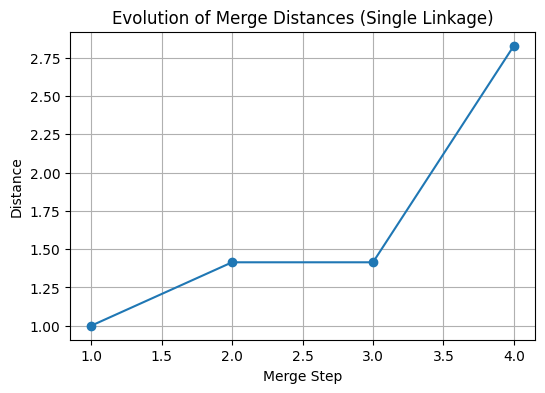

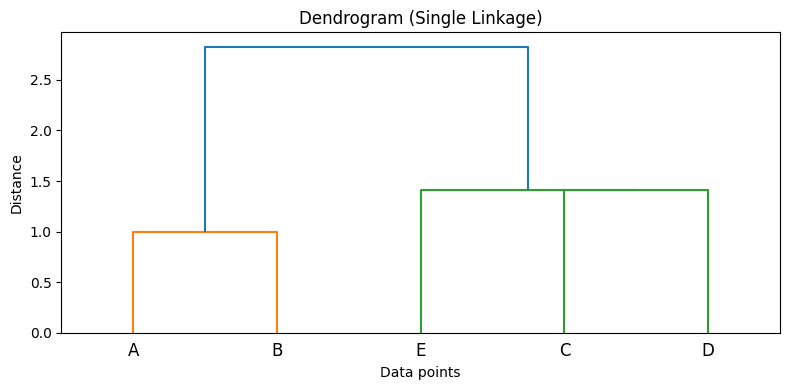

In [10]:
from scipy.spatial.distance import euclidean

# Step 0: Initialization — Each point is its own cluster
clusters = {i: [i] for i in range(len(X))}
history = []

def cluster_distance(c1, c2):
    # Single linkage: min distance between any point in cluster 1 and any point in cluster 2
    # we use Euclidean distance
    return min(np.sqrt(np.sum((X[i] - X[j])**2)) for i in c1 for j in c2)

step = 1
while len(clusters) > 1:
    # Find the two closest clusters
    pairs = [(i, j, cluster_distance(clusters[i], clusters[j]))
             for i in clusters for j in clusters if i < j]
    i_min, j_min, dist_min = min(pairs, key=lambda x: x[2])

    # Explanation step-by-step
    print(f"> Step {step}")
    print(f"> Merge clusters: {clusters[i_min]} + {clusters[j_min]} at distance {dist_min:.2f}")

    # Save history for plotting later
    history.append(dist_min)

    # Merge clusters
    new_cluster = clusters[i_min] + clusters[j_min]
    new_index = max(clusters) + 1
    clusters[new_index] = new_cluster
    del clusters[i_min]
    del clusters[j_min]

    step += 1

# === PLOT DISTANCE EVOLUTION ===

plt.figure(figsize=(6, 4))
plt.plot(range(1, len(history) + 1), history, marker='o', linestyle='-')
plt.title("Evolution of Merge Distances (Single Linkage)")
plt.xlabel("Merge Step")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

# === STANDARD LINKAGE & DENDROGRAM ===

Z = linkage(X, method='single', metric='euclidean')

plt.figure(figsize=(8, 4))
dendrogram(Z, labels=labels)
plt.title("Dendrogram (Single Linkage)")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

## HAC with Python packages

In this notebook we will build classes with spherical and equal variances.

<u>Note1:</u>  
Hierarchical Agglomerative Clustering (HAC) or simply Hierarchical Clustering in english.  
Clustering: the goal is to group data according to a coherent structure.  
Agglomerative (bottom-up) or "Ascendante" in French because we move up the hierarchy by gradually merging clusters.  
We start from the bottom (each point alone) and move upwards (clusters get bigger and bigger).

<u>Note2:</u>  
The complexity of agglomerative hierarchical methods ranges from $O(n^2)$ to $O(n^3)$,  
whereas the complexity of an exact divisive method would be $O(2^n)$. The storage complexity for the dissimilarity matrix is $O(n^2)$.  
For this reason, hierarchical clustering is generally not well suited for large-scale data.

In [11]:
## HAC using Scipy

In [12]:
# R code: 
# cluster.colors <- brewer.pal(8,"Dark2") 
# blobs <- read.table(file="Data/blobs.txt", header=F, sep=",") ggplot(blobs, aes(x=V1, y=V2)) + geom_point()

# Install and import necessary libraries
# !pip install pandas matplotlib seaborn palettable
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from palettable.colorbrewer.qualitative import Dark2_8

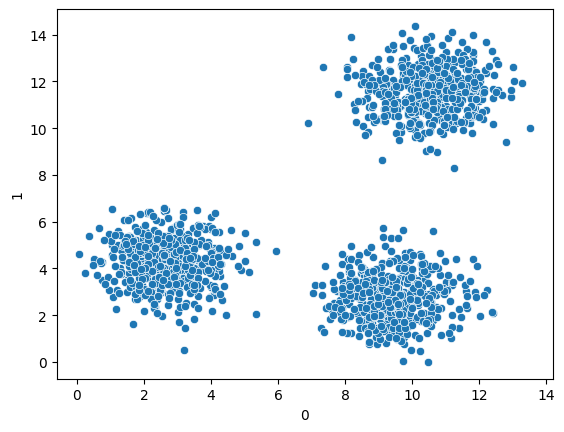

In [13]:
# Define the cluster colors using the Dark2 palette
cluster_colors = Dark2_8.hex_colors

# Read the data from 'blobs.txt' into a pandas DataFrame
# The file has no header and is comma-separated
path_name = '/Users/davidtbo/Library/Mobile Documents/com~apple~CloudDocs/data/external'
blobs = pd.read_csv(filepath_or_buffer=os.path.join(path_name,'blobs.txt'), header=None)

# Create a scatter plot using seaborn
# V1 (first column) is mapped to the x-axis, V2 (second column) is mapped to the y-axis
sns.scatterplot(x=blobs.iloc[:, 0], y=blobs.iloc[:, 1])

# Display the plot
plt.show()

## HAC using Single linkage method

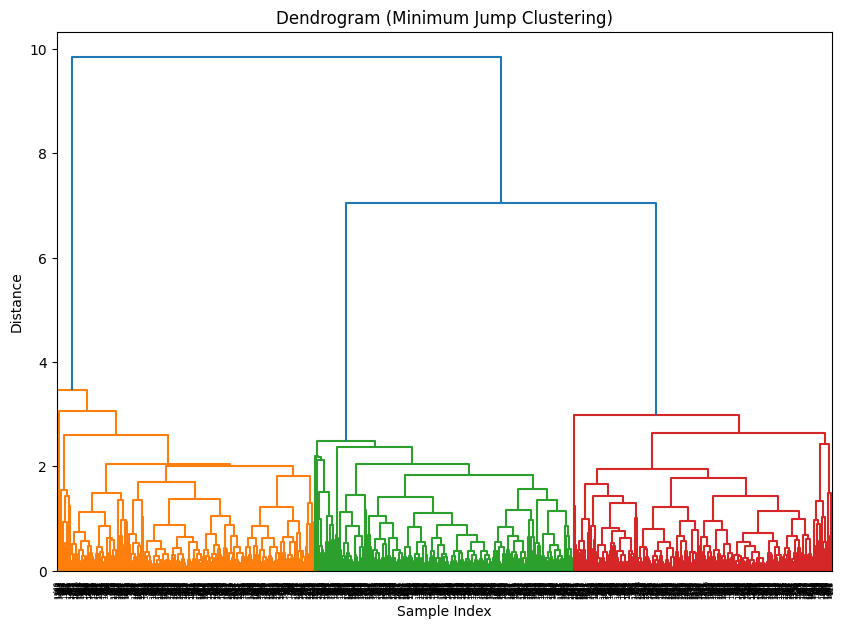

In [14]:
# R code: 
# dend <- hclust(dist(blobs[,1:2], method="euclidean"), method="single")

# Minimum jump clustering
# Hierarchical clustering using the minimum jump method
# Calculates the Euclidean distance between data points (first two columns of 'blobs')
# Performs hierarchical clustering using the single linkage method ('minimum jump')

# 1) On calcule les distances euclidienne entre les points de données (premières deux colonnes de 'blobs')
# 2) On effectue le clustering hiérarchique en utilisant la méthode de Single linkage (minimum jump)

import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd

# Calculate the pairwise euclidean distance (matrix)

dist_matrix = ssd.pdist(blobs.iloc[:, 0:2], metric='euclidean')

# Perform single linkage hierarchical clustering (see the course: ML_coursDauphine_unsupervised_1_CAH_Kmeans.pdf) 

# dend = sch.linkage(dist_matrix, method='single')
# dend = sch.linkage(dist_matrix, method='complete')
dend = sch.linkage(dist_matrix, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(dend)
plt.title('Dendrogram (Minimum Jump Clustering)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

### Evolution of the aggregation criterion

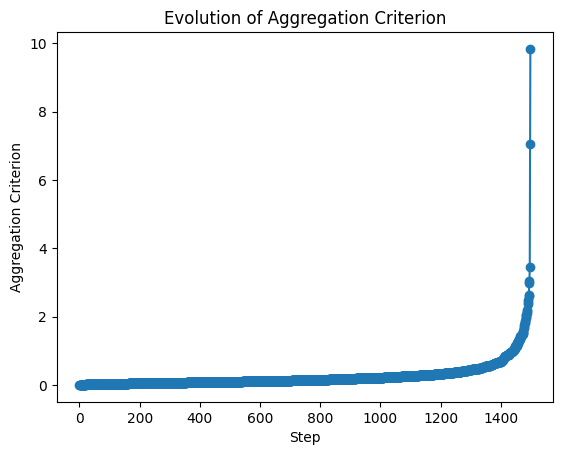

In [15]:
# prompt: plot(dend$height, type="b")

# Plot the evolution of the aggregation criterion 
# (montre l'évolution des distances de fusion)
# The idea is to use the "break" (elbow, jump) in the aggregation distance curve:
# At first, the distances are small (merging of nearby clusters).
# When we start forcing the merger of very distant clusters, the distance suddenly increases.
# The goal is to cut the dendrogram just before this big jump, which gives a more "natural" number of clusters.
# dend[:, 2] contains the linkage distances (aggregation criterion)
plt.plot(dend[:, 2], marker='o', linestyle='-') # Use marker='o' for points and linestyle='-' for lines
plt.xlabel("Step")
plt.ylabel("Aggregation Criterion")
plt.title("Evolution of Aggregation Criterion")
plt.show()

Before the "big" jump to 2.70, there are 3 jumps:  
1. < 1.00 small merging of points very close  
2. 1.00 -> 1.35 first jump (merging of small clusters)  
3. 1.35 -> 1.60 second jump (merging of clusters)  
4. 1.60 -> 2.70 "big" jump (merging of groups very far from each others, the minimal euclidean distance between these far clusters s'envole:)  

Like we do not consider the "big" jump, there are three clusters.  
=> Choice of a partition into 3 classes

### Build the clustering

Now the we know K (the number of clusters), we can use the `fcluster` function to extract the clusters from the hierarchical clustering result.

In [16]:
from scipy.cluster.hierarchy import fcluster

# Cut the dendrogram to get 3 clusters

clusters = fcluster(dend, 3, criterion='maxclust')

# To get a summary similar to `summary(as.factor(clusters))` in R,
# we can use pandas value_counts.
print("Cluster distribution:")
print(pd.Series(clusters).value_counts().sort_index())

# The `order_clusters_as_data = F` in R's `cutree` affects how the clusters are
# ordered in the returned vector. By default, `fcluster` returns the cluster
# assignments in the order of the original data points. This behavior is similar
# to `order_clusters_as_data = TRUE` in R.
# If you needed the clusters ordered based on the dendrogram leaves order (which is less common
# when just getting flat clusters), you would need to reorder the original data
# based on the dendrogram's leaf order before calling fcluster or reorder
# the resulting cluster array. However, for summarizing the cluster distribution,
# the order doesn't matter, and the default behavior of `fcluster` is usually what's desired
# for assigning cluster labels back to the original data points.

Cluster distribution:
1    500
2    500
3    500
Name: count, dtype: int64


### Dendrogram with the obtained partitioning and clustering

The following code performs a visual evaluation of hierarchical clustering results by displaying two plots side-by-side:  
* Dendrogram: Shows the hierarchical clustering tree structure.
* Scatter plot: Displays the original data points colored by their assigned cluster.  

<u>Note</u>:  
In R, the dendrogram branches are colored by cluster using color_branches, but this feature is not directly replicated in Python due to complexity.  
Instead, the Python code uses scipy to plot the dendrogram and colors the scatter plot points according to cluster assignments.  
This side-by-side visualization helps to visually assess how well the clusters correspond to the data structure.

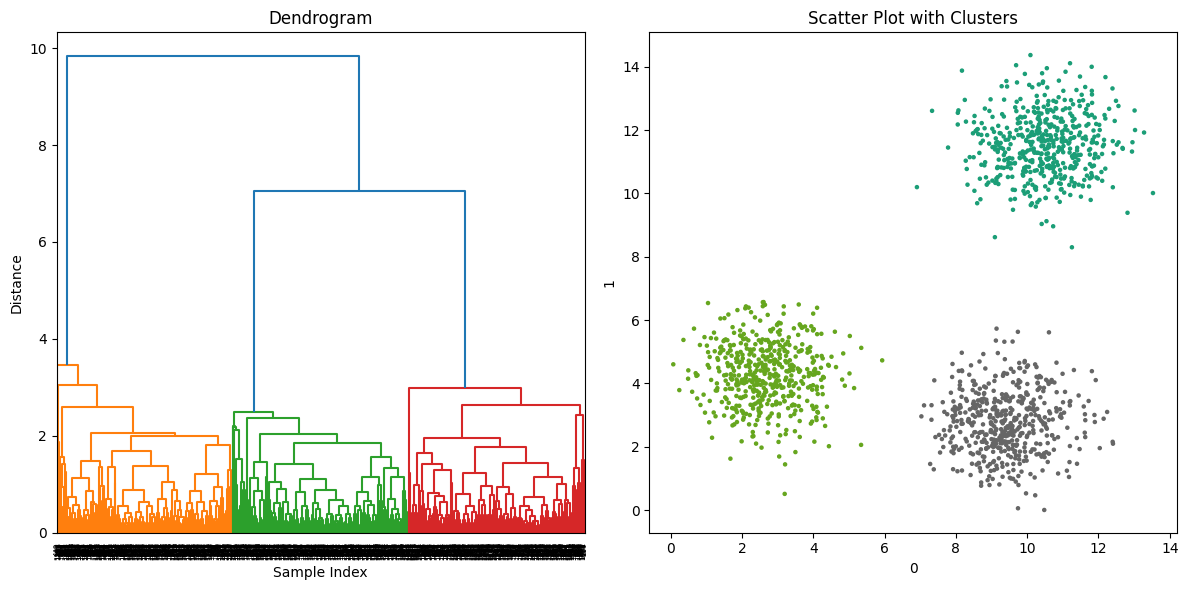

In [17]:
# R code: 
# dend <- color_branches(as.dendrogram(dend), clusters=clusters, col=cluster.colors[1:3]) 
# clusters <- cutree(dend, 3, order_clusters_as_data = T) 
# plot.list <-list(ggplot(as.ggdend(dend)),ggplot(blobs, aes(V1,V2)) + geom_point(col=cluster.colors[clusters], size=0.2)) 
# ggmatrix(plot.list, nrow=1, ncol=2, showXAxisPlotLabels = F, showYAxisPlotLabels = F, xAxisLabels=c("dendrogram", "scatter plot")) + theme_bw()

# !pip install plotnine mizani
# Importing necessary libraries
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import pandas as pd # Assuming blobs is a pandas DataFrame and clusters is a pandas Series or numpy array

# Assuming 'dend' is the linkage matrix from sch.linkage
# Assuming 'blobs' is a pandas DataFrame with the original data
# Assuming 'clusters' is a numpy array or pandas Series containing the cluster assignments (1, 2, or 3)

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the dendrogram in the first subplot
# We don't directly color branches based on fcluster results here as it's complex with scipy
sch.dendrogram(dend, ax=axes[0])
axes[0].set_title('Dendrogram')
axes[0].set_xlabel('Sample Index')
axes[0].set_ylabel('Distance')

# Define colors for the scatter plot based on the number of clusters
# Using a colormap and mapping cluster labels to colors
num_clusters = len(set(clusters))
cmap = plt.colormaps.get_cmap('Dark2') # Using the recommended method to get a colormap
colors = [cmap(i / (num_clusters - 1)) for i in range(num_clusters)] if num_clusters > 1 else [cmap(0)]

# Plot the scatter plot with colored points based on cluster assignments in the second subplot
# Need to map cluster labels (1, 2, 3, ...) to colormap indices (0, 1, 2, ...)
# Assuming clusters are 1-indexed, subtract 1 for 0-indexed colormap access
scatter = axes[1].scatter(blobs.iloc[:, 0], blobs.iloc[:, 1], c=[colors[c-1] for c in clusters], s=5)
axes[1].set_title('Scatter Plot with Clusters')
axes[1].set_xlabel(blobs.columns[0]) # Use actual column names if available, or generic 'V1'
axes[1].set_ylabel(blobs.columns[1]) # Use actual column names if available, or generic 'V2'


# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

# Note: The R code's `color_branches` functionality which colors the dendrogram branches
# based on the flat clustering result is not directly replicated here as it requires
# significant manipulation of the dendrogram plotting output which is beyond
# a simple conversion. The focus is on displaying the dendrogram and the
# clustered data side-by-side.

### Evaluating Cluster Quality Against Ground Truth Labels with the Confusion Matrix

The purpose is to check whether the clusters correspond well to the original categories,  
in order to evaluate the quality of the clustering against a 'ground truth' or known label.  
This is a common analysis step after clustering to better understand the meaning of the detected groups."

In [18]:
# R code: 
# table(clusters, blobs$V3)

# Assuming 'clusters' is a numpy array or pandas Series
# Assuming 'blobs' is a pandas DataFrame and V3 refers to the 3rd column (index 2)

# To perform the equivalent of R's `table(clusters, blobs$V3)`
# we can use pandas `crosstab` function.
# `crosstab` computes a frequency table of two (or more) factors.
# The first argument `index` corresponds to the first factor (clusters)
# The second argument `columns` corresponds to the second factor (blobs['V3'])

# Ensure that the lengths of 'clusters' and 'blobs' are compatible.
# The number of cluster assignments should match the number of rows in blobs.
if len(clusters) == len(blobs):
    print("\nFrequency table of clusters vs. original category (blobs column V3):")
    # Use blobs.iloc[:, 2] to access the third column (V3)
    contingency_table = pd.crosstab(clusters, blobs.iloc[:, 2])
    print(contingency_table)
else:
    print("Error: The number of cluster assignments does not match the number of data points in blobs.")




Frequency table of clusters vs. original category (blobs column V3):
2        0    1    2
row_0               
1      500    0    0
2        0    0  500
3        0  500    0


## HAC using Ward's Method

The Ward's method regoups two clusters that minimize the percentage of loss of variance inter-groups (Between Sum of Square) after aggregation:  

After the aggregations of two clusters, the BSS always decrease.  

* BSS general formula with the Euclidean distance is given by:    

$$BSS = \sum_{k=1}^K|C_k|||w_k - \bar{X}||^2$$

* BSS before regrouping A and B is given by:  

$$BBS_{(A,B)} = \sum_{k=1, k \neq A, B}^K |C_k|\times ||w_k - \bar{X}||^2 + C_A|\times ||w_A - \bar{X}||^2 + C_B|\times ||w_B - \bar{X}||^2$$  

* BSS after regrouping A and B is given by:  

$$BBS_{(AB)} = \sum_{k=1, k \neq A, B}^K |C_k|\times ||w_k - \bar{X}||^2 + (C_A| + |C_B|) \times ||w_{AB} - \bar{X}||^2$$  

At each step Ward's method minimize: $BBS_{(A,B)} - BBS_{(AB)}$

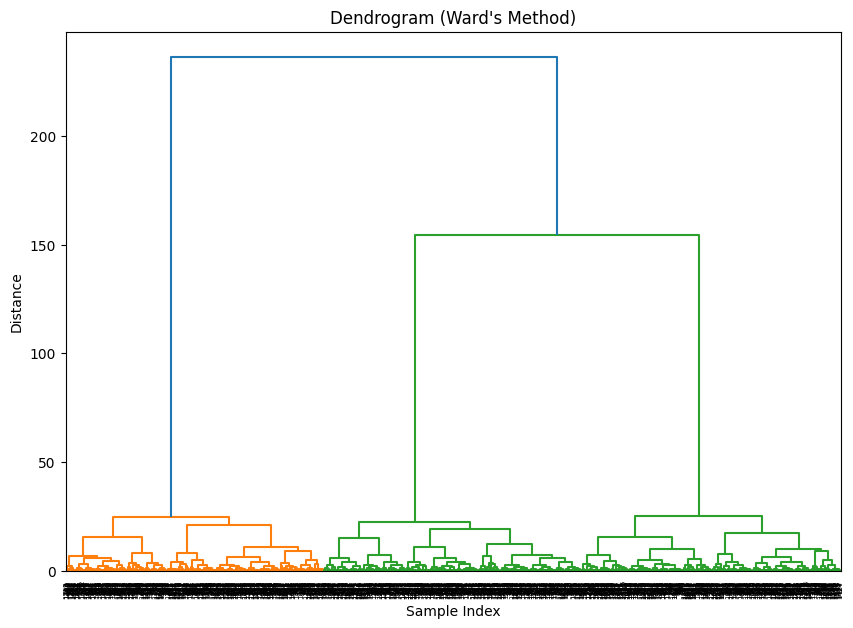

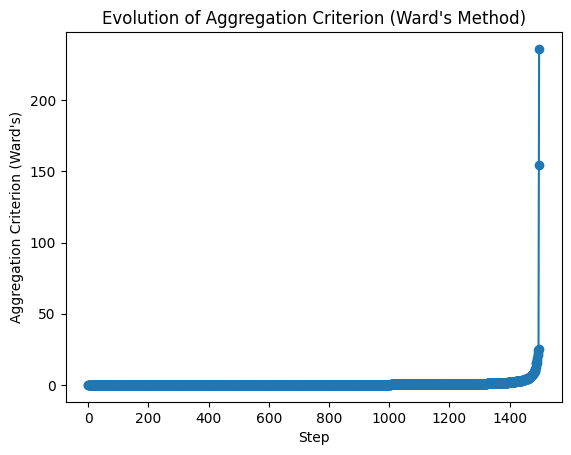

In [19]:
# R code: 
# dend <- hclust(dist(blobs[,1:2], method="euclidean"), method="ward.D2")

# Perform Ward's method hierarchical clustering
# Calculates the Euclidean distance between data points (first two columns of 'blobs')
# Performs hierarchical clustering using Ward's method
# `blobs.iloc[:, 0:2]` selects the first two columns of the DataFrame 'blobs'
# `metric='euclidean'` specifies the distance metric as Euclidean
# `method='ward'` specifies Ward's linkage method


# Calculate the pairwise euclidean distance (matrix)

dist_matrix = ssd.pdist(blobs.iloc[:, 0:2], metric='euclidean')

dend_ward = sch.linkage(dist_matrix, method='ward')

# Plot the dendrogram for Ward's method
plt.figure(figsize=(10, 7))
sch.dendrogram(dend_ward)
plt.title('Dendrogram (Ward\'s Method)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Plot the evolution of the aggregation criterion for Ward's method
plt.plot(dend_ward[:, 2], marker='o', linestyle='-')
plt.xlabel("Step")
plt.ylabel("Aggregation Criterion (Ward's)")
plt.title("Evolution of Aggregation Criterion (Ward's Method)")
plt.show()

### Choice of a partition into 3 classes

In [20]:
# prompt: clusters <- cutree(dend, 3, order_clusters_as_data = F)
# summary(as.factor(clusters))

# Based on the dendrogram and the evolution of the aggregation criterion plot for Ward's method,
# visually identify the point where the increase in the criterion is largest.
# The comment "Choix d’un découpage à 3 classes" suggests that visually,
# there is a large jump in the criterion for Ward's method that would lead to choosing 3 classes.

# The equivalent R code `cutree(dend, 3, order_clusters_as_data = F)` for Ward's method
# using scipy's `fcluster` function.
# Cut the dendrogram `dend_ward` to get 3 clusters.
clusters_ward = fcluster(dend_ward, 3, criterion='maxclust')

# To get a summary similar to `summary(as.factor(clusters))` in R for Ward's method,
# use pandas value_counts.
print("\nCluster distribution (Ward's Method):")
print(pd.Series(clusters_ward).value_counts().sort_index())


Cluster distribution (Ward's Method):
1    500
2    500
3    500
Name: count, dtype: int64


### Dendrogram with the obtained partitioning and clustering

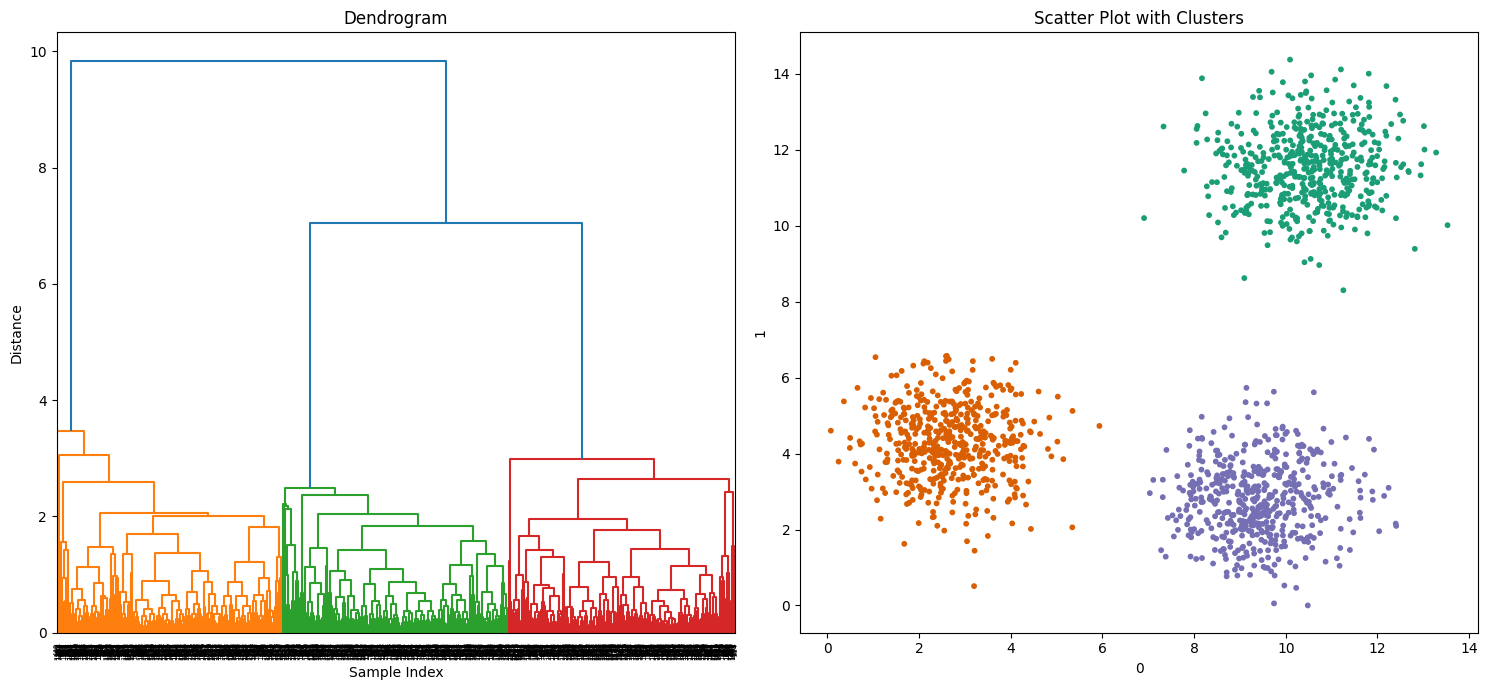

In [21]:
# !pip install plotnine mizani
from plotnine import ggplot, aes, geom_point, theme_bw
from mizani.formatters import percent_format
from plotnine.guides import guide_legend
from plotnine.scales import scale_x_continuous, scale_y_continuous
from plotnine.labels import labs

# Import `ggmatrix` if needed, though a simple subplot approach is used below
# !pip install ggmatrix # Install if you want to use ggmatrix (less common in Python plotnine context)
# from ggmatrix import ggmatrix # Import if installed

# Import necessary libraries for plotting the dendrogram using matplotlib
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import numpy as np

# Assuming 'dend' is the linkage matrix from sch.linkage (from the single linkage method)
# Assuming 'clusters' is a numpy array or pandas Series containing the cluster assignments (1, 2, or 3) from single linkage
# Assuming 'blobs' is a pandas DataFrame with the original data

# Define colors for the scatter plot based on the number of clusters
# Using the cluster_colors defined earlier (Dark2_8 palette)
# Ensure the number of colors is sufficient for the number of clusters
num_clusters = len(set(clusters))
if num_clusters > len(cluster_colors):
    print(f"Warning: Not enough colors defined for {num_clusters} clusters. Using repeated colors.")
    colors_for_scatter = [cluster_colors[c % len(cluster_colors)] for c in clusters]
else:
    # Map cluster labels (1, 2, 3, ...) to the defined colors (index 0, 1, 2, ...)
    colors_for_scatter = [cluster_colors[c-1] for c in clusters]


# Create a figure and a set of subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(15, 7)) # Adjust figsize as needed

# Plot the dendrogram in the first subplot using matplotlib
# To color branches by flat clusters, this requires more advanced manipulation of the dendrogram object,
# which is not as straightforward as in R's `color_branches`. A common approach in matplotlib
# is to draw the dendrogram first and then potentially add colored lines/patches afterwards,
# or use the `color_threshold` argument if cutting by distance, but not directly by maxclust.
# For simplicity here, we plot the standard dendrogram.
sch.dendrogram(dend, ax=axes[0])
axes[0].set_title('Dendrogram')
axes[0].set_xlabel('Sample Index')
axes[0].set_ylabel('Distance')

# Plot the scatter plot with colored points based on cluster assignments in the second subplot using matplotlib
# Use the colors_for_scatter list generated based on cluster assignments
axes[1].scatter(blobs.iloc[:, 0], blobs.iloc[:, 1], c=colors_for_scatter, s=10) # Adjust size 's' as needed
axes[1].set_title('Scatter Plot with Clusters')
axes[1].set_xlabel(blobs.columns[0])
axes[1].set_ylabel(blobs.columns[1])

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

# Note: Directly replicating `ggmatrix` and `as.ggdend` from R in Python using plotnine
# and matplotlib is complex. The approach above uses matplotlib for both plots within
# a single figure's subplots, providing a similar side-by-side visualization.
# If you specifically need plotnine for the scatter plot, you would create a plotnine
# object for the scatter plot and display it separately or attempt to combine it
# using more advanced methods or libraries that support combining matplotlib and plotnine plots.
# The matplotlib approach for both is generally more direct when showing the dendrogram alongside.

# If you want to use plotnine for the scatter plot:
# scatter_plot = (
#     ggplot(blobs, aes(x=blobs.columns[0], y=blobs.columns[1], color=clusters.astype(str))) # Use string for discrete color
#     + geom_point(size=0.2)
#     + labs(x="V1", y="V2", color="Cluster")
#     + theme_bw()
# )

# And then display the matplotlib dendrogram and the plotnine scatter plot.
# Combining them into a single figure as `ggmatrix` does in R is not a standard
# feature of plotnine/matplotlib without significant custom code or using a
# specialized library if one exists. The matplotlib subplot approach shown above
# is the most common way to achieve side-by-side plots in Python.

### Confusion Matrix

In [22]:
# prompt: table(clusters, blobs$V3)

# The R code `table(clusters, blobs$V3)` creates a contingency table
# showing the counts of observations for each combination of `clusters`
# and the values in the third column of `blobs` (indexed as 2 in pandas).

# This was already implemented in the preceding code block.
# To reiterate the code for clarity:

# Ensure that the lengths of 'clusters' and 'blobs' are compatible.
if len(clusters) == len(blobs):
    print("\nFrequency table of clusters vs. original category (blobs column V3):")
    # Use blobs.iloc[:, 2] to access the third column (V3)
    contingency_table = pd.crosstab(clusters, blobs.iloc[:, 2])
    print(contingency_table)
else:
    print("Error: The number of cluster assignments does not match the number of data points in blobs.")


Frequency table of clusters vs. original category (blobs column V3):
2        0    1    2
row_0               
1      500    0    0
2        0    0  500
3        0  500    0


Exercise:  

Test the different hierarchical classification methods on the other simulated datasets (“aniso.txt”, “aggregation.txt”, “different_density.txt”, “noisy_moons.txt”).  
In each case, perform clustering on the first two columns (data coordinates), and compare with the true number of classes.

## HAC on iris data

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


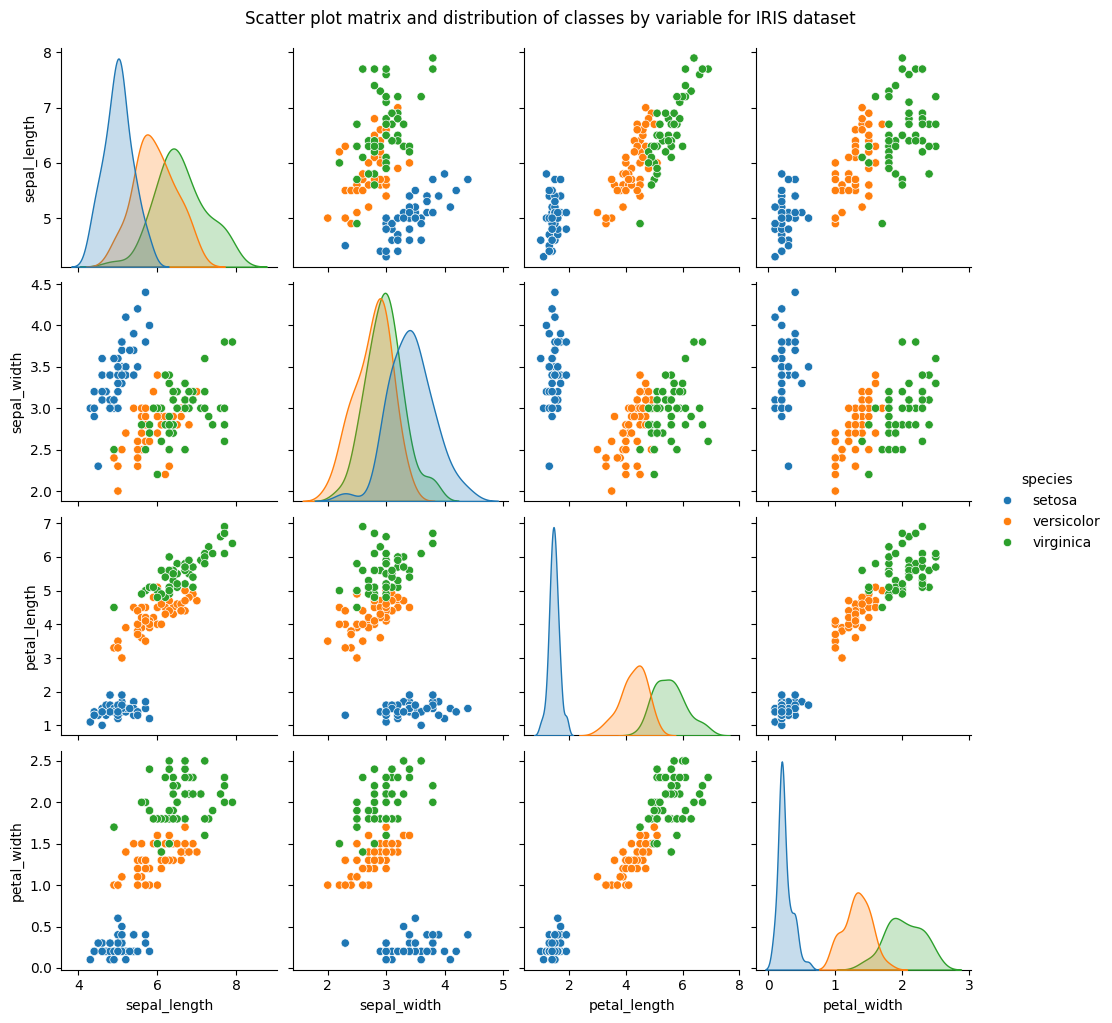

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the IRIS dataset
# head(iris) equivalent in pandas
iris = sns.load_dataset('iris')
print(iris.head())

# Normalization (zero mean, unit variance)
# Equivalent to iris.norm <- data.frame(sapply(iris[,1:4], scale)) in R
scaler = StandardScaler()
iris_norm_data = scaler.fit_transform(iris.iloc[:, 0:4])
iris_norm = pd.DataFrame(iris_norm_data, columns=iris.columns[0:4])

# Add the 'Species' column back to the normalized dataframe
# Equivalent to iris.norm$Species <- iris$Species
iris_norm['species'] = iris['species']

# Scatter plot matrices and distribution of classes by variable
# Equivalent to ggpairs(iris, columns=1:4, aes(color=Species)) using seaborn's pairplot
# Note: ggpairs from R's GGally is more comprehensive, pairplot is a common alternative in Python
sns.pairplot(iris, hue="species")
plt.suptitle("Scatter plot matrix and distribution of classes by variable for IRIS dataset", y=1.02) # Add a title
plt.show()

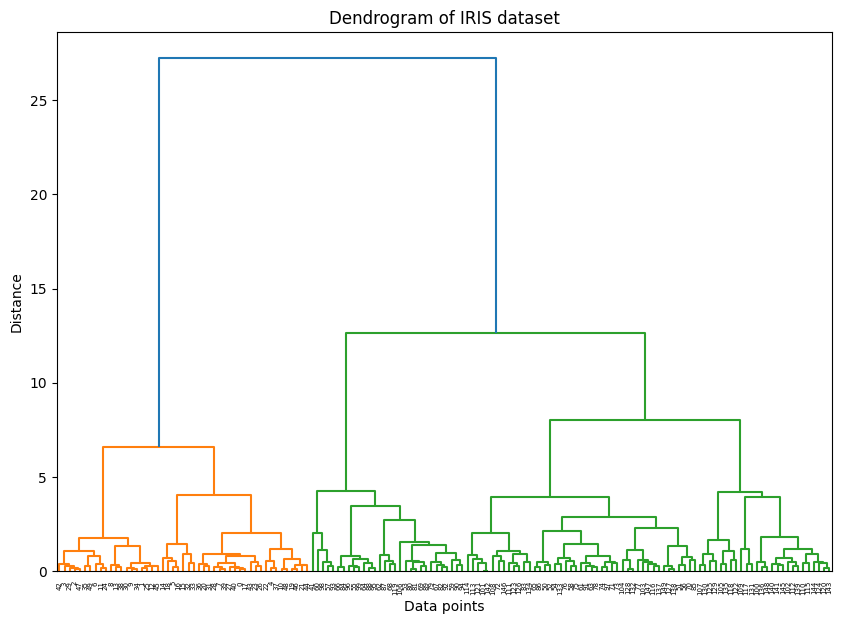

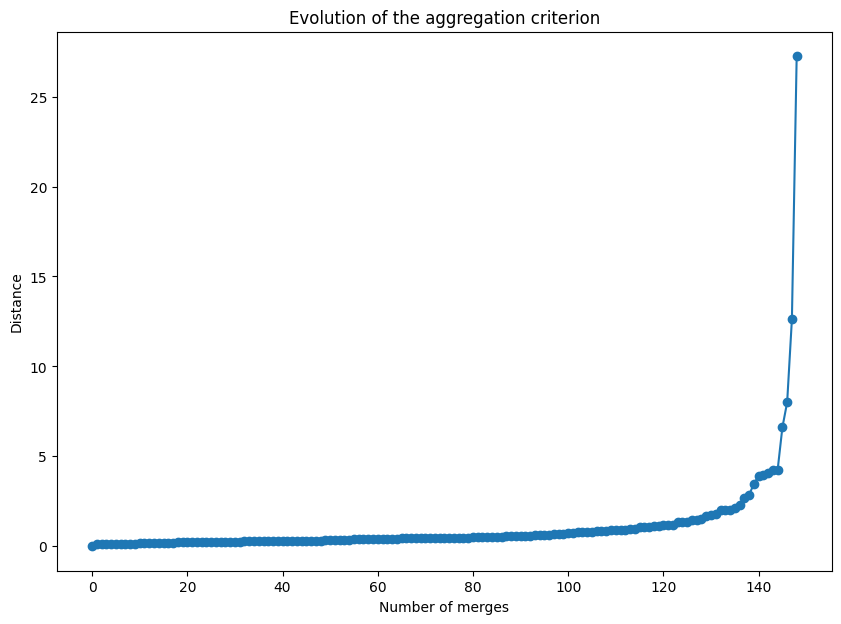

Cluster distribution:
Cluster 0: 29
Cluster 1: 20
Cluster 2: 30
Cluster 3: 45
Cluster 4: 26


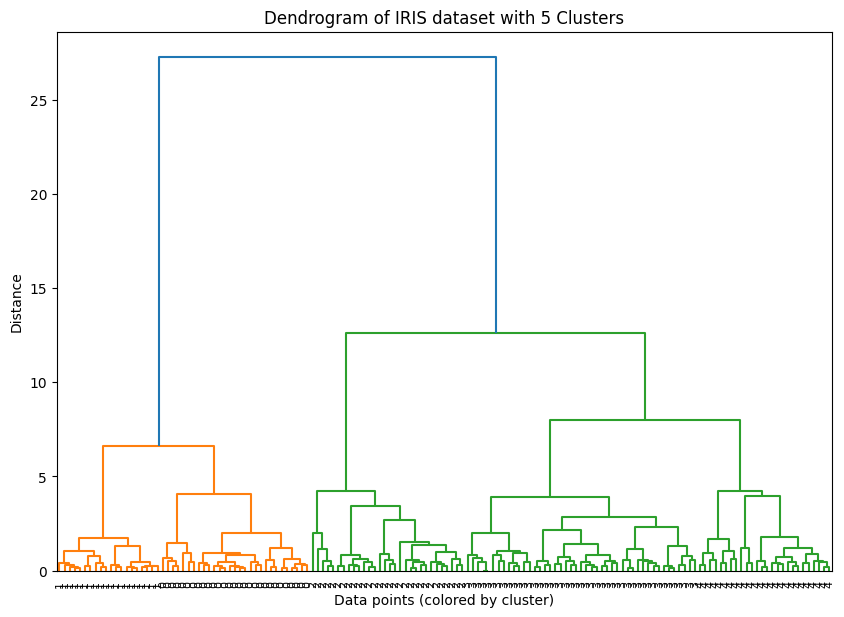

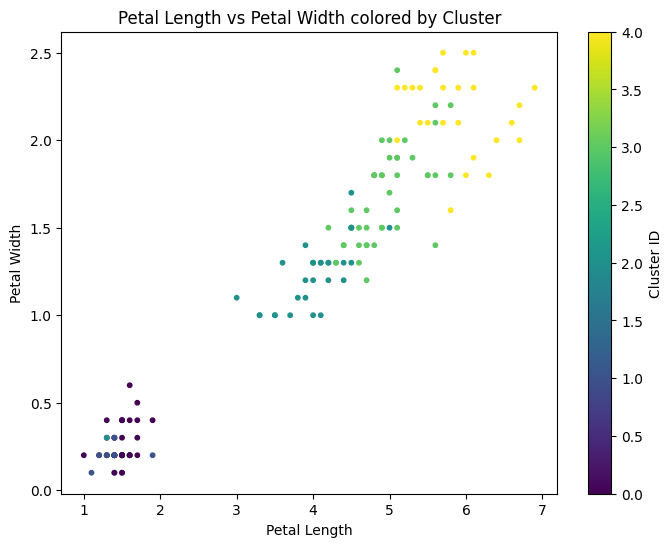


Confusion Matrix (True Species vs Clusters):


array([[29, 20,  1,  0,  0],
       [ 0,  0, 27, 23,  0],
       [ 0,  0,  2, 22, 26],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0]])

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import numpy as np

# Hierarchical Classification with Ward's method
# Equivalent to dend <- hclust(dist(iris.norm[,1:4], method="euclidean"), method="ward.D2") in R
linked = linkage(iris_norm.iloc[:, 0:4], method='ward')

# Dendrogram
# Equivalent to plot(dend) in R
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Dendrogram of IRIS dataset")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()

# Evolution of the aggregation criterion
# Equivalent to plot(dend$height, type="b") in R
plt.figure(figsize=(10, 7))
plt.plot(linked[:, 2], marker='o')
plt.title("Evolution of the aggregation criterion")
plt.xlabel("Number of merges")
plt.ylabel("Distance")
plt.show()


# Choosing a cut at 5 classes
# Equivalent to clusters <- cutree(dend, 5, order_clusters_as_data = F) in R
# Note: cutree in scipy does not have an equivalent to order_clusters_as_data = F,
# the clusters are assigned in the order of the original data.
clusters = cut_tree(linked, n_clusters=5).flatten()

# Summary of the number of elements in each cluster
# Equivalent to summary(as.factor(clusters)) in R
unique_clusters, counts = np.unique(clusters, return_counts=True)
print("Cluster distribution:")
for cluster_id, count in zip(unique_clusters, counts):
    print(f"Cluster {cluster_id}: {count}")

# Dendrogram with the partitioning and obtained clustering
# Equivalent to dend <- color_branches(as.dendrogram(dend), clusters=clusters, col=cluster.colors[1:5]) in R
# and the subsequent plotting code.
# Coloring branches in matplotlib dendrogram is more involved than in R's dendextend.
# We'll replot the dendrogram and potentially add labels/colors manually if needed.
plt.figure(figsize=(10, 7))
dendrogram(
    linked,
    leaf_rotation=90.,
    leaf_font_size=8.,
    labels=clusters # Using cluster labels as leaf labels for visualization
)
plt.title("Dendrogram of IRIS dataset with 5 Clusters")
plt.xlabel("Data points (colored by cluster)")
plt.ylabel("Distance")
plt.show()

# Scatter plot with clustering results
# Equivalent to ggplot(iris, aes(Petal.Length, Petal.Width)) + geom_point(col=cluster.colors[clusters], size=1))
plt.figure(figsize=(8, 6))
scatter = plt.scatter(iris['petal_length'], iris['petal_width'], c=clusters, cmap='viridis', s=10)
plt.title("Petal Length vs Petal Width colored by Cluster")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.colorbar(scatter, label='Cluster ID')
plt.show()

# Creating a combined plot (Equivalent to ggmatrix part)
# This requires more custom plotting. We'll show the two plots separately as direct equivalent of ggmatrix isn't straightforward in basic matplotlib/seaborn.

# Confusion matrix
# Equivalent to table(clusters, iris$Species) in R
from sklearn.metrics import confusion_matrix
# Need to map the species names to numerical labels to compare with cluster IDs
species_map = {species: i for i, species in enumerate(iris['species'].unique())}
true_labels = iris['species'].map(species_map)

conf_matrix = confusion_matrix(true_labels, clusters)
print("\nConfusion Matrix (True Species vs Clusters):")
conf_matrix

# For a more detailed comparison, you might want to see how each cluster relates to the original species.
# Note that cluster IDs from cut_tree are arbitrary and don't necessarily correspond to the original species labels.
# You would typically assign cluster labels to the majority species in each cluster for interpretation.
